In [202]:
%matplotlib inline

In [203]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [204]:
# define trained data sets
data = [
    [3, 1.5,1], 
    [2, 1,0], 
    [4,1.5,1], 
    [3,1,0], 
    [3.5,0.5,1], 
    [2,0.5,0], 
    [5.5,1,1], 
    [1,1,0]
]

In [205]:
mystry_flower = [4.5, 1] # we need to find the missed flower type, if point > 0.5 it's red or point < 0.5 it's blue

In [206]:
#  Neural Network
#
#     O
#    / \
#   /   \
#  O     O length, width, type, w1, w2, b

In [207]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

In [208]:
def sigmoid_p(x):
    return sigmoid(x) - (1-sigmoid(x))

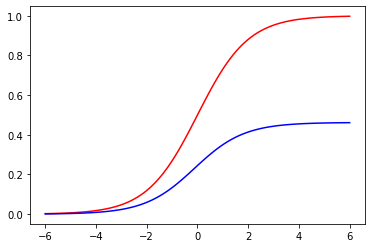

In [209]:
t = np.linspace(6,-6, 100)
y = sigmoid(t)
yp = sigmoid_p(y)
plt.plot(t, y, 'red')
plt.plot(t, yp, 'blue')

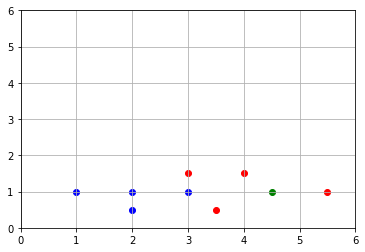

In [210]:
#scatter data
plt.axis([0,6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    if point[2] == 0:
        color = "blue"
    else:
        color = "red"
    plt.scatter(point[0], point[1], c=color)
    
plt.scatter(mystry_flower[0], mystry_flower[1], c='green')

In [245]:
#train the network
def train():
    # define wights with random values
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 5000
    learning_rate = 0.1
    
    costs = []

    #looping as generations
    for i in range(iterations):
        #pick a random point from dataset 
        index = np.random.randint(len(data))
        point = data[index]

        #define the formula
        z = w1 * point[0] + w2 * point[1] + b
        pred = sigmoid(z)
        target = point[2]

        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)

        drcost = 2 * (pred - target)
        drpred_dz = sigmoid_p(z)

        drz_drw1 = point[0]
        drz_drw2 = point[1]
        drz_drb = 1

        dr_cost_dw1 = drcost * drpred_dz * drz_drw1
        dr_cost_dw2 = drcost * drpred_dz * drz_drw2
        dr_cost_db = drcost * drpred_dz * drz_drb

        w1 = w1 - learning_rate * dr_cost_dw1
        w2 = w2 - learning_rate * dr_cost_dw2
        b = b - learning_rate * dr_cost_db
    fig = plt.plot(costs)
    return {w1, w2, b}

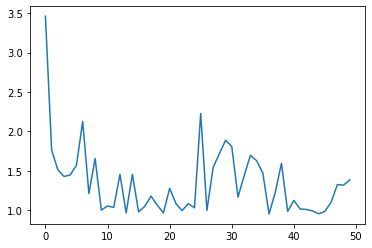

In [246]:
w1, w2, b = train()

In [261]:
def find_color(m1, m2):
    z = w1 * m1 + w2 * m2 + b
    predication = sigmoid(z)
    print("Predication is "  + str(predication))
    if predication <= 0.5:
        color = "Blue"
    else:
        color = "Red"
    print(color)
    os.system("Say " + color)

In [267]:
#point = data[0] # should be red
point = mystry_flower
find_color(point[0], point[1])

Predication is 0.751758037671652
Red
